Our Groups Goal!

Label + Data Integrity/ISRC

-number of streams by label

-country, year, registrant, random code

-use artist, title, songwriter to identify duplicate ISRC

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

Might as well just upload those because that what you do in python.
Our team is  data integrity issues (isrc) / label.

In [2]:
%matplotlib inline

In [3]:
music_df = pd.read_csv("../data/NSS-Sample.csv")
music_df = music_df.rename(columns={"If ":"ISRC"})
music_df.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,USUG12101043,US,UG1,21.0,NaN,AudioMack,"10,175",Future,NaN,FUTURE FT DEJ LOAF HEY THERE PROD BY DDS,#unknown#,181,0
1,USRC12100543,US,RC1,21.0,NaN,SoundCloud,"8,597",LUCKY3RD,LUCKY3RD,Keep It Cool LUCKY3RD,Keep It Cool LUCKY3RD,133,0
2,USSM12102263,US,SM1,21.0,NaN,SoundCloud,"261,280",LUCKY3RD,LUCKY3RD,Life Goes On LUCKY3RD,Life Goes On LUCKY3RD,171,0
3,USLD91731547,US,LD9,17.0,2/1/2021,Trebel,5,Bachata & Merengue Mix,Orchard,No dudes de mi- Merengue & Bachata Mix,Mega Mix 2010,1250,0
4,USAT22007048,US,AT2,20.0,NaN,AudioMack,"62,105",Foolio,NaN,WHEN I SEE YOU REMIX,#unknown#,187,0


In [4]:
music_df=music_df.set_axis(["ISRC","Country","Registrant","Year","Month_Streamed",
                            "Platform","Streams","Artist","Label","Recording_Title","Release_Title",
                            "Duration_Sec","Songwriter_Listed"], axis=1)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ISRC               98240 non-null   object 
 1   Country            98303 non-null   object 
 2   Registrant         98303 non-null   object 
 3   Year               98239 non-null   float64
 4   Month_Streamed     91898 non-null   object 
 5   Platform           96001 non-null   object 
 6   Streams            100000 non-null  object 
 7   Artist             100000 non-null  object 
 8   Label              98992 non-null   object 
 9   Recording_Title    100000 non-null  object 
 10  Release_Title      99931 non-null   object 
 11  Duration_Sec       100000 non-null  int64  
 12  Songwriter_Listed  100000 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.9+ MB


In [5]:
music_null = music_df[music_df.isna().any(axis=1)]

In [6]:
music_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10285 entries, 0 to 99837
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISRC               8525 non-null   object 
 1   Country            8588 non-null   object 
 2   Registrant         8588 non-null   object 
 3   Year               8524 non-null   float64
 4   Month_Streamed     2183 non-null   object 
 5   Platform           6286 non-null   object 
 6   Streams            10285 non-null  object 
 7   Artist             10285 non-null  object 
 8   Label              9277 non-null   object 
 9   Recording_Title    10285 non-null  object 
 10  Release_Title      10216 non-null  object 
 11  Duration_Sec       10285 non-null  int64  
 12  Songwriter_Listed  10285 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.1+ MB


In [8]:
music_null['Streams'] = music_null['Streams'].astype(str)
music_null['Streams'] = music_null['Streams'].str.replace(',','')
music_null['Streams'] = music_null['Streams'].astype(int)

C:\Users\phili\AppData\Local\Temp/ipykernel_12732/4266343818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_null['Streams'] = music_null['Streams'].astype(str)
C:\Users\phili\AppData\Local\Temp/ipykernel_12732/4266343818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_null['Streams'] = music_null['Streams'].str.replace(',','')
C:\Users\phili\AppData\Local\Temp/ipykernel_12732/4266343818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [9]:
nulls=music_null.groupby(['Platform'], as_index=False).agg({'Artist':'count', 'Streams': 'sum'})
nonulls = music_df.groupby(['Platform'], as_index=False).agg({'Artist':'count', 'Streams': 'sum'})
print(nulls)
print(nonulls)

           Platform  Artist    Streams
0            Amazon     265    2354987
1           Anghami       3       1141
2             Apple    1792  208803153
3         AudioMack     550   11991559
4            Deezer       5         10
5               GTL      26      23734
6         LiveXLive      37       9946
7           Melodyv      15      77947
8      Midwest Tape      50      48847
9          MixCloud       4       2661
10        MonkingMe       1       3549
11          NugsNet       4        279
12          Pandora     268   18950277
13       PowerMusic       8       3154
14          Recisio      22         29
15      Smithsonian       1          9
16       SoundCloud     520   30227661
17          Spotify     583   44719729
18            Tidal     905    8395267
19           Trebel      19       1095
20  Ultimate Guitar      19        309
21        Wolfgangs       4        965
22          YouTube    1132   52974663
23     iHeart Radio      53     206751
              Platform  A

In [10]:
music_df.isnull().sum()

ISRC                 1760
Country              1697
Registrant           1697
Year                 1761
Month_Streamed       8102
Platform             3999
Streams                 0
Artist                  0
Label                1008
Recording_Title         0
Release_Title          69
Duration_Sec            0
Songwriter_Listed       0
dtype: int64

In [11]:
music_df["ISRC"].fillna(" ", inplace = True)
music_df["Country Code"].fillna(" ", inplace = True)
music_df["Registrant Code"].fillna(" ", inplace = True)
music_df["Year of Reference"].fillna(" ", inplace = True)
music_df["Usage Period"].fillna(" ", inplace = True)
music_df["Streaming Platform (DSP)"].fillna(" ", inplace = True)
music_df["Streams"].fillna(" ", inplace = True)
music_df["Recording Artist"].fillna(" ", inplace = True)
music_df["Recording Label"].fillna(" ", inplace = True)
music_df["Recording Title"].fillna(" ", inplace = True)
music_df["Release Title"].fillna(" ", inplace = True)
music_df["Recording Duration (Seconds)"].fillna(" ", inplace = True)

KeyError: 'Country Code'

In [12]:
music_df.isnull().sum()

ISRC                    0
Country              1697
Registrant           1697
Year                 1761
Month_Streamed       8102
Platform             3999
Streams                 0
Artist                  0
Label                1008
Recording_Title         0
Release_Title          69
Duration_Sec            0
Songwriter_Listed       0
dtype: int64

Following code is getting rid of commas in the streams column to make it an integer

In [13]:
music_df['Streams'] = music_df['Streams'].astype(str)
music_df['Streams']=music_df['Streams'].str.replace(',','')
music_df['Streams'] = music_df['Streams'].astype(int)

So we're having an extrordinarily difficult time turning the years column into an integer. Why is this an impossible feat? Why does it refuse to turn into a string even though there are no nulls? Why does it refuse to turn into a float when there are no nulls???

In [14]:
indie = music_df[music_df['Artist'] == music_df['Label']]

In [15]:
music_df.describe()

,Year,Streams,Duration_Sec,Songwriter_Listed
count,98239.000000,1.000000e+05,100000.000000,100000.000000
mean,19.671933,5.626550e+04,1016.893690,0.541610
std,12.638870,2.620276e+05,15565.692133,0.498268
min,0.000000,1.000000e+00,0.000000,0.000000
25%,17.000000,6.807000e+03,149.000000,0.000000
50%,19.000000,1.677250e+04,190.000000,1.000000
75%,20.000000,3.990300e+04,236.000000,1.000000
max,99.000000,2.145617e+07,818738.000000,1.000000


In the following code, we're trying to create a chart that shows the streams by platform. Once we do that, we can also start showing the streams by label.

In [16]:
platform_sums = music_df.groupby(['Platform'], as_index=False).agg({'Streams':['sum']})
platform_sums.columns = ['Platform','Streams']
platform_sums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Platform  29 non-null     object 
 1   Streams   29 non-null     float64
dtypes: float64(1), object(1)
memory usage: 592.0+ bytes


In [17]:
platform_sums.head()

,Platform,Streams
0,Amazon,1.511998e+08
1,Anghami,3.468200e+04
2,Apple,1.606454e+09
3,AudioMack,1.199156e+07
4,Classical Archives,2.000000e+01


In [21]:
label_sums = music_df.groupby(['Label'], as_index=False).agg({'Streams':['sum']})
label_sums.columns = ['Label','Streams']
label_nulls = music_null.groupby(['Label'], as_index=False).agg({'Streams':['sum']})
label_nulls.columns = ['Label','Streams']
label_sums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11778 entries, 0 to 11777
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    11778 non-null  object
 1   Streams  11778 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 138.1+ KB


In [19]:
print(label_sums.nlargest(n=50,columns=['Streams']))

                                                   Label    Streams
1738                                    Atlantic Records  172396961
2979                                            Columbia  131147208
842                                    300 Entertainment   96692925
1418                              Alamo (Geffen Records)   88320747
9861                                        Taylor Swift   77937703
1420                                       Alamo Records   72800179
6232                                        Lofi Records   69694317
8445                                    Republic Records   64775231
8160                                        RBMG/Def Jam   60845258
10871                                     Warner Records   59667514
3675   Dreamville, Inc., Under exclusive license to R...   52628821
5439                                     Jay Rebel Music   43494541
7455                                                 OVO   43332946
2579                       CMG/N-Less/Interscope

Using the code in this markdown isn't working because we're trying to make a grid with a series.

grid = sns.FacetGrid(music_df, hue = "Platform")
grid.map(sns.barplot, music_df['Label'], music_df.groupby('Platform')['Streams'].sum())
plt.xlim(reversed(plt.xlim()))
grid.add_legend()

C:\Users\phili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Amazon'),
 Text(1, 0, 'Anghami'),
 Text(2, 0, 'Apple'),
 Text(3, 0, 'AudioMack'),
 Text(4, 0, 'Classical Archives'),
 Text(5, 0, 'Deezer'),
 Text(6, 0, 'Fan Label'),
 Text(7, 0, 'GTL'),
 Text(8, 0, 'LiveXLive'),
 Text(9, 0, 'Melodyv'),
 Text(10, 0, 'Midwest Tape'),
 Text(11, 0, 'MixCloud'),
 Text(12, 0, 'MonkingMe'),
 Text(13, 0, 'NugsNet'),
 Text(14, 0, 'Pacemaker'),
 Text(15, 0, 'Pandora'),
 Text(16, 0, 'PowerMusic'),
 Text(17, 0, 'Qoboz'),
 Text(18, 0, 'Recisio'),
 Text(19, 0, 'Smithsonian'),
 Text(20, 0, 'Sonos'),
 Text(21, 0, 'SoundCloud'),
 Text(22, 0, 'Spotify'),
 Text(23, 0, 'Tidal'),
 Text(24, 0, 'Trebel'),
 Text(25, 0, 'Ultimate Guitar'),
 Text(26, 0, 'Wolfgangs'),
 Text(27, 0, 'YouTube'),
 Text(28, 0, 'iHeart Radio')]

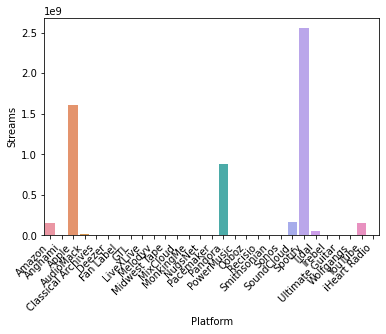

In [20]:
platform_bar = sns.barplot(platform_sums['Platform'],platform_sums['Streams'])
platform_bar.set_xticklabels(platform_bar.get_xticklabels(), rotation=45, horizontalalignment='right')
#wow ok so this gives us a chart i suppose but not QUITE what we're looking for.

C:\Users\phili\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, ' & Moe Shop'),
 Text(1, 0, '#<YAML::Object:0xb7172160>'),
 Text(2, 0, '#Boyz Entertainment'),
 Text(3, 0, '#Boyz Entertainment LLC'),
 Text(4, 0, '#Boyz Entertainment LLC / EMPIRE'),
 Text(5, 0, '#JUSTAREGULARDAY'),
 Text(6, 0, '$NOT'),
 Text(7, 0, '$UICIDEBOY$'),
 Text(8, 0, '(C)ATLUS (C)SEGA All rights reserved.'),
 Text(9, 0, '071071 Records'),
 Text(10, 0, '1 Deep Entertainment / EMPIRE'),
 Text(11, 0, '101 Distribution'),
 Text(12, 0, '1102538 Records DK'),
 Text(13, 0, '1106711 Records DK'),
 Text(14, 0, '1144223 Records DK2'),
 Text(15, 0, '1216421 Records DK'),
 Text(16, 0, '1237560 Records DK'),
 Text(17, 0, '1248705 Records DK'),
 Text(18, 0, '1259526 Records DK2'),
 Text(19, 0, '1268268 Records DK2'),
 Text(20, 0, '1286609 Records DK'),
 Text(21, 0, '12Tone Music'),
 Text(22, 0, '1400 Entertainment / 10K Projects'),
 Text(23, 0, '1400 Entertainment/TenThousand Projects'),
 Text(24, 0, '1413598 Records DK'),
 Text(25, 0, '143/Reprise'),
 Text(26, 0, '1489100 Reco

C:\Users\phili\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phili\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 37682 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phili\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 35222 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phili\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 21147 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phili\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23492 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\phili\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 29983 missing from c

C:\Users\phili\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\phili\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 127757 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\phili\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12511 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\phili\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12521 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\phili\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\phili\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12523 missing from current font

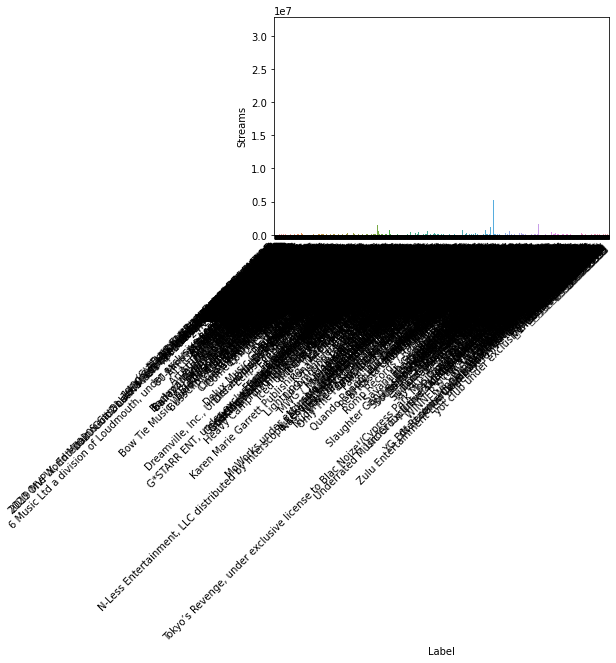

In [23]:
label_nullbar = sns.barplot(label_nulls['Label'],label_nulls['Streams'])
label_nullbar.set_xticklabels(label_nullbar.get_xticklabels(), rotation=45, horizontalalignment='right')
#wow ok so this gives us a chart i suppose but not QUITE what we're looking for.

In [ ]:
print(platform_sums)

dataframe1 = pd.DataFrame(data={"column1": [1, 2, 3, 4, 5]})
dataframe2 = pd.DataFrame(data={"column1": [1, 2]})

common = dataframe1.merge(dataframe2, on=["column1"])
result = dataframe1[~dataframe1.column1.isin(common.column1)]

In [ ]:
# Extract the various columns from ISRC
ISRCdecode = music_df['ISRC']
# Extract the ISRC code by artist
ISRCdecodeartist = [entry[7:] for entry in ISRCdecode]
print(ISRCdecodeartist)

In [ ]:
artzip = (list(music_df['Artist']),ISRCdecodeartist)

This is not doing what i want right now, but we'll get there!

In [ ]:
print(artzip)